In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.stats import f_oneway
import scipy.stats as stats
from scipy.stats import anderson
from scipy.stats import normaltest


from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import pearsonr


In [212]:
veri2 = pd.read_csv('dataset.csv')

In [213]:
print(veri2.Stress_Level.dtype)
print(veri2.Stress_Level.unique())


object
['1' '5' '3' '6' '10' '2' '8' '9' nan '4' 'Very High' '7']


In [214]:
veri2 = veri2[pd.to_numeric(veri2['Stress_Level'], errors='coerce').notnull()]

In [215]:
print(veri2.Stress_Level.dtype)
print(veri2.Stress_Level.unique())


object
['1' '5' '3' '6' '10' '2' '8' '9' '4' '7']


In [216]:
veri2["Stress_Level"] = pd.to_numeric(veri2["Stress_Level"])


In [217]:
print(veri2.Stress_Level.dtype)
print(veri2.Stress_Level.unique())

int64
[ 1  5  3  6 10  2  8  9  4  7]


In [218]:
veri2 = veri2.sort_values("Stress_Level")


In [219]:
print(veri2.Stress_Level.dtype)
print(veri2.Stress_Level.unique())

int64
[ 1  2  3  4  5  6  7  8  9 10]


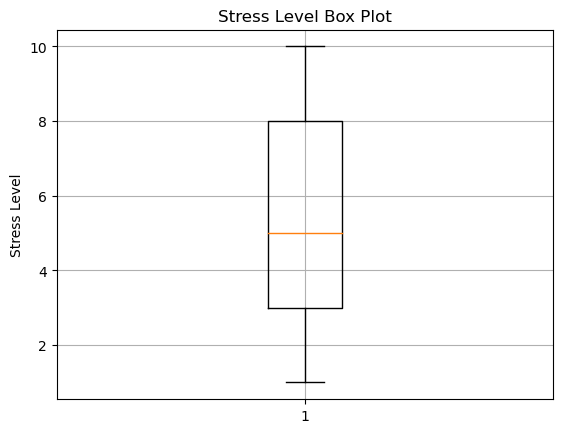

In [220]:
plt.boxplot(veri2["Stress_Level"])
plt.title("Stress Level Box Plot")
plt.ylabel("Stress Level")
plt.grid(True)
plt.show()

In [221]:
print(veri2.Activity_Level.dtype)
print(veri2.Activity_Level.unique())

object
['Highly Active' 'Active' 'Actve' 'Highly_Active' 'Sedentary' 'Seddentary'
 nan]


In [222]:
düzeltmeler = {
    "Seddentary": "Sedentary",
    "Actve": "Active",
    "Highly Active": "Highly_Active"
}
veri2["Activity_Level"] = veri2["Activity_Level"].replace(düzeltmeler)
veri2 = veri2.dropna(subset=["Activity_Level"])

In [223]:
print(veri2.Activity_Level.unique())

['Highly_Active' 'Active' 'Sedentary']


In [224]:
sedentary_stress = veri2[veri2["Activity_Level"] == "Sedentary"]["Stress_Level"]

In [225]:
print(sedentary_stress.describe())

count    3238.000000
mean        5.492279
std         2.853833
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Stress_Level, dtype: float64


In [226]:
print(veri2['Stress_Level'].describe())

count    9554.000000
mean        5.469018
std         2.872009
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Stress_Level, dtype: float64


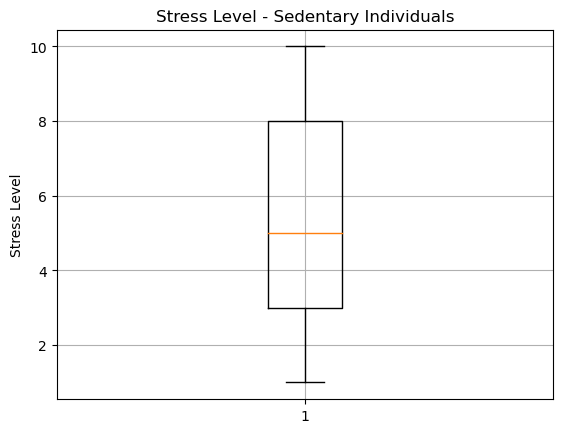

In [227]:
plt.boxplot(sedentary_stress)
plt.title("Stress Level - Sedentary Individuals")
plt.ylabel("Stress Level")
plt.grid(True)
plt.show()

In [228]:
print(veri2['Heart_Rate_(BPM)'].dtype)
print(veri2['Heart_Rate_(BPM)'].unique())

float64
[58.93977586 60.71814387 78.3332867  ... 78.31674684 86.35361583
 80.29323472]


In [229]:
print(veri2['Sleep_Duration_(hours)'].dtype)
print(veri2['Sleep_Duration_(hours)'].unique())

object
['7.167235622316564' '5.442510844429291' '7.506740221976588' ...
 '8.783527130600616' '5.161785771797253' '5.5363251457819045']


In [230]:
veri2['Sleep_Duration_(hours)'] = pd.to_numeric(veri2['Sleep_Duration_(hours)'], errors='coerce')

In [231]:
veri2['Sleep_Duration_(hours)'] = veri2['Sleep_Duration_(hours)'].astype(float)

In [232]:
print(veri2['Sleep_Duration_(hours)'].min())

-0.1944527906201543


In [233]:
#Blood_Oxygen_Level_(%)
#Heart_Rate_(BPM)

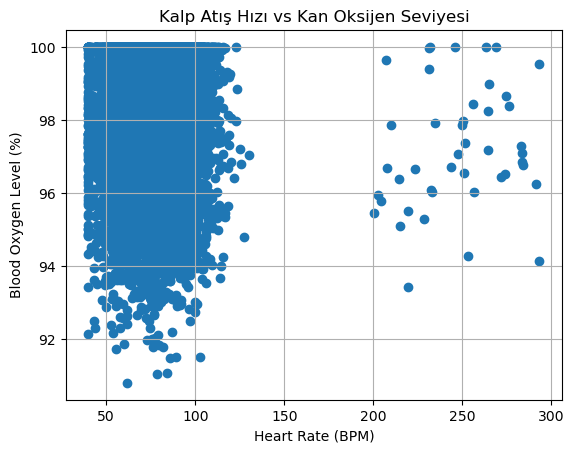

In [234]:
plt.scatter(veri2['Heart_Rate_(BPM)'], veri2['Blood_Oxygen_Level_(%)'])
plt.xlabel('Heart Rate (BPM)')
plt.ylabel('Blood Oxygen Level (%)')
plt.title('Kalp Atış Hızı vs Kan Oksijen Seviyesi')
plt.grid(True)
plt.show()

In [235]:
corr = veri2['Heart_Rate_(BPM)'].corr(veri2['Blood_Oxygen_Level_(%)'])
print(f"Korelasyon katsayısı: {corr}")


Korelasyon katsayısı: -0.01702143490633346


In [236]:
temiz_veri = veri2[['Heart_Rate_(BPM)', 'Blood_Oxygen_Level_(%)']].replace([np.inf, -np.inf], np.nan).dropna()

In [237]:
corr_coef, p_value = pearsonr(temiz_veri['Heart_Rate_(BPM)'], temiz_veri['Blood_Oxygen_Level_(%)'])

print(f"Pearson Korelasyon Katsayısı: {corr_coef}")
print(f"P-Değeri: {p_value}")

Pearson Korelasyon Katsayısı: -0.017021434906333406
P-Değeri: 0.10826278957870192


In [238]:
temiz_veri = veri2[['Stress_Level', 'Heart_Rate_(BPM)']].replace([np.inf, -np.inf], np.nan).dropna()

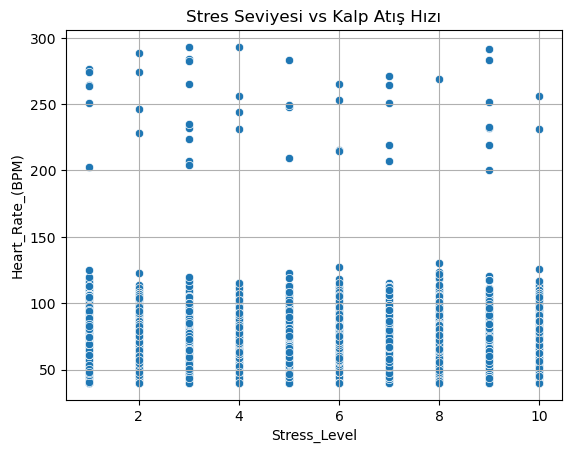

In [239]:
# Dağılım grafiği
sns.scatterplot(x='Stress_Level', y='Heart_Rate_(BPM)', data=temiz_veri)
plt.title("Stres Seviyesi vs Kalp Atış Hızı")
plt.grid(True)
plt.show()


In [240]:
corr, p = spearmanr(temiz_veri['Stress_Level'], temiz_veri['Heart_Rate_(BPM)'])

print(f"Spearman Korelasyon Katsayısı: {corr}")
print(f"P-Değeri: {p}")


Spearman Korelasyon Katsayısı: -0.0016416912624761162
P-Değeri: 0.8750702760561065


In [241]:
temiz_veri = veri2[['Sleep_Duration_(hours)', 'Stress_Level']].replace([np.inf, -np.inf], np.nan).dropna()


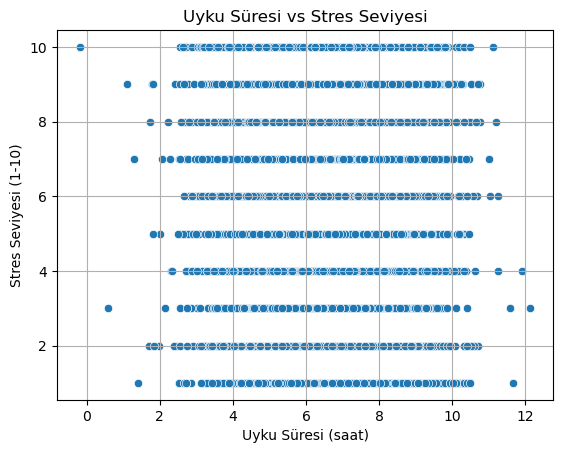

In [242]:
sns.scatterplot(x='Sleep_Duration_(hours)', y='Stress_Level', data=temiz_veri)
plt.title("Uyku Süresi vs Stres Seviyesi")
plt.xlabel("Uyku Süresi (saat)")
plt.ylabel("Stres Seviyesi (1-10)")
plt.grid(True)
plt.show()

In [243]:
from scipy.stats import spearmanr

corr, p = spearmanr(temiz_veri['Sleep_Duration_(hours)'], temiz_veri['Stress_Level'])

print(f"Spearman Korelasyon Katsayısı: {corr}")
print(f"P-Değeri: {p}")


Spearman Korelasyon Katsayısı: 0.002392642254995959
P-Değeri: 0.8188096128761072


In [254]:
# Adım sayısı ve kan oksijen seviyesi ile ilişkili veriyi alalım
filtered_data = veri2[['Step_Count', 'Blood_Oxygen_Level_(%)']].replace([np.inf, -np.inf], np.nan).dropna()

# Pearson Korelasyon analizi
from scipy.stats import pearsonr

corr, p_value = pearsonr(filtered_data['Step_Count'], filtered_data['Blood_Oxygen_Level_(%)'])

print(f"Pearson Korelasyon Katsayısı: {corr}")
print(f"P-Değeri: {p_value}")


Pearson Korelasyon Katsayısı: -0.002108780233638745
P-Değeri: 0.8399184311404954


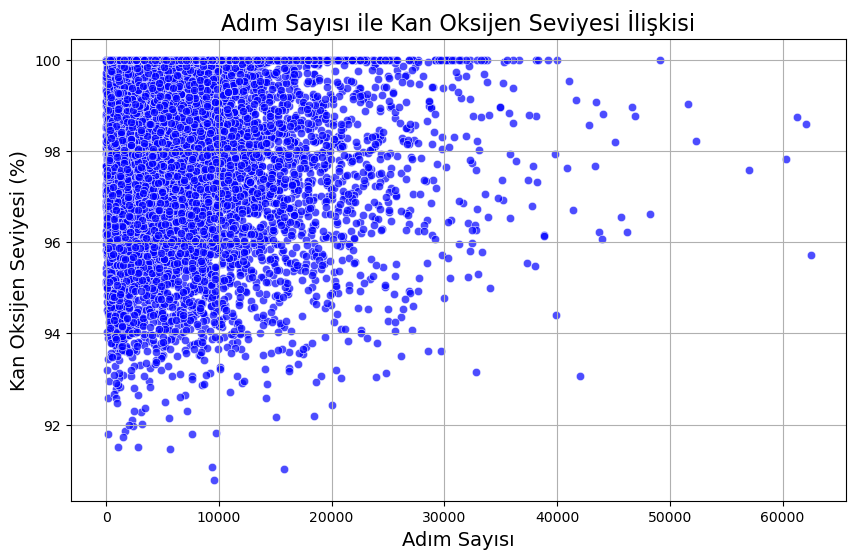

In [255]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='Step_Count', y='Blood_Oxygen_Level_(%)', color='blue', alpha=0.7)

# Başlık ve etiketler
plt.title("Adım Sayısı ile Kan Oksijen Seviyesi İlişkisi", fontsize=16)
plt.xlabel("Adım Sayısı", fontsize=14)
plt.ylabel("Kan Oksijen Seviyesi (%)", fontsize=14)
plt.grid(True)
plt.show()

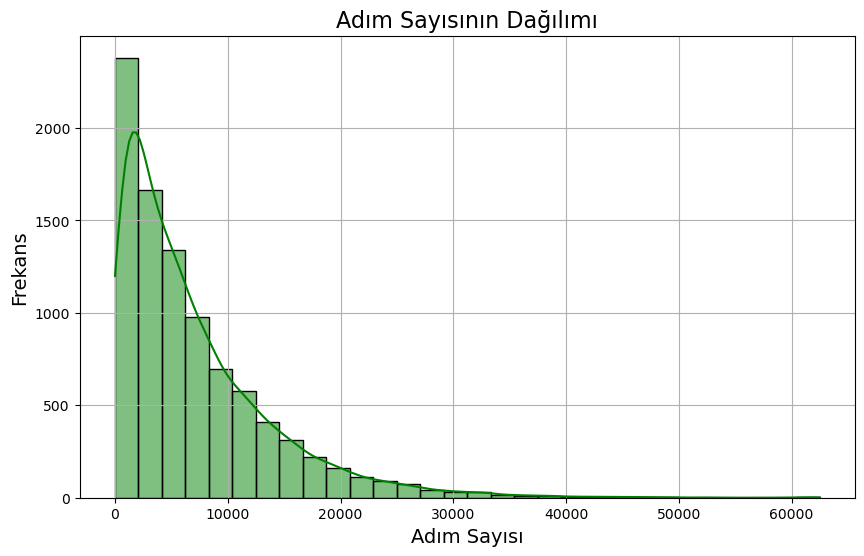

In [256]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Step_Count'], kde=True, bins=30, color='green')

# Başlık ve etiketler
plt.title("Adım Sayısının Dağılımı", fontsize=16)
plt.xlabel("Adım Sayısı", fontsize=14)
plt.ylabel("Frekans", fontsize=14)
plt.grid(True)
plt.show()


In [257]:
print(veri2['Step_Count'].describe())

count     9456.000000
mean      6988.559721
std       6875.175366
min          0.910138
25%       2018.817531
50%       4961.772107
75%       9754.310768
max      62486.690753
Name: Step_Count, dtype: float64


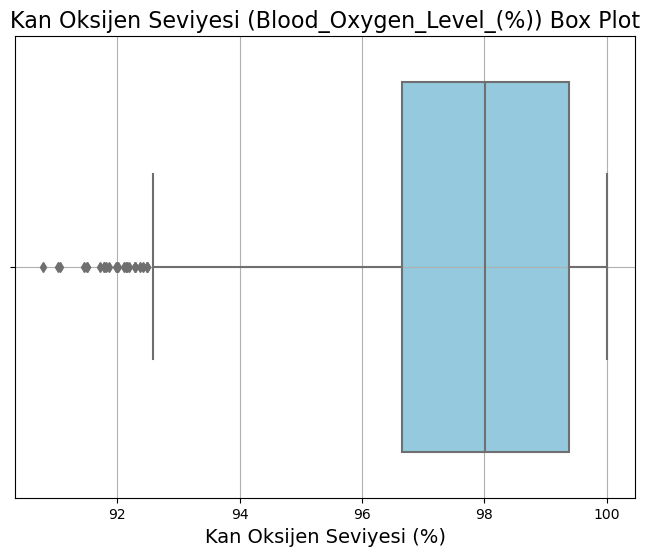

In [258]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=veri2['Blood_Oxygen_Level_(%)'], color='skyblue')

# Başlık ve etiketler
plt.title("Kan Oksijen Seviyesi (Blood_Oxygen_Level_(%)) Box Plot", fontsize=16)
plt.xlabel("Kan Oksijen Seviyesi (%)", fontsize=14)
plt.grid(True)
plt.show()

In [259]:
print(veri2['Blood_Oxygen_Level_(%)'].describe())

count    9275.000000
mean       97.837364
std         1.739583
min        90.791208
25%        96.656494
50%        98.010422
75%        99.377747
max       100.000000
Name: Blood_Oxygen_Level_(%), dtype: float64


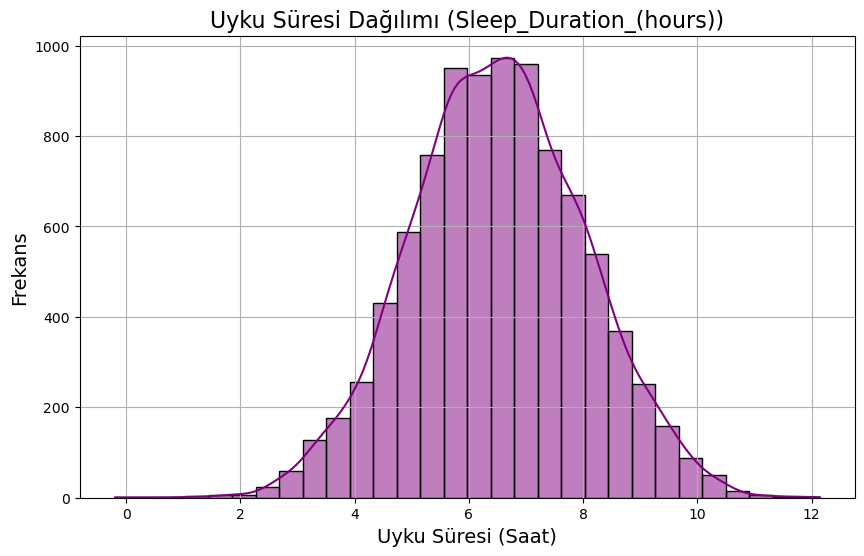

In [260]:
plt.figure(figsize=(10, 6))
sns.histplot(veri2['Sleep_Duration_(hours)'], bins=30, kde=True, color='purple')

# Başlık ve eksen etiketleri
plt.title("Uyku Süresi Dağılımı (Sleep_Duration_(hours))", fontsize=16)
plt.xlabel("Uyku Süresi (Saat)", fontsize=14)
plt.ylabel("Frekans", fontsize=14)
plt.grid(True)
plt.show()

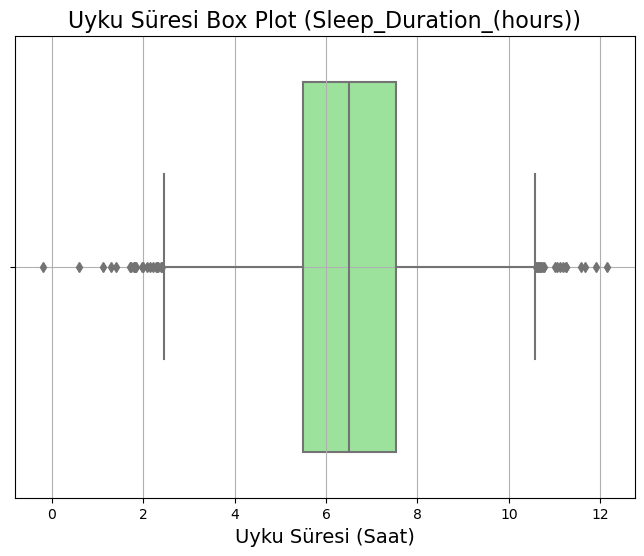

In [262]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=veri2['Sleep_Duration_(hours)'], color='lightgreen')

# Başlık ve etiketler
plt.title("Uyku Süresi Box Plot (Sleep_Duration_(hours))", fontsize=16)
plt.xlabel("Uyku Süresi (Saat)", fontsize=14)
plt.grid(True)
plt.show()


In [263]:
print(veri2['Sleep_Duration_(hours)'].describe())

count    9169.000000
mean        6.505892
std         1.508566
min        -0.194453
25%         5.492884
50%         6.502792
75%         7.532555
max        12.140233
Name: Sleep_Duration_(hours), dtype: float64


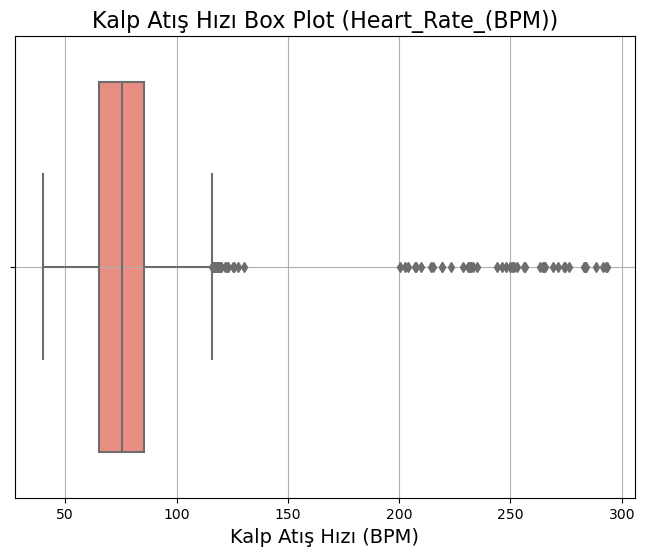

In [264]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=veri2['Heart_Rate_(BPM)'], color='salmon')

plt.title("Kalp Atış Hızı Box Plot (Heart_Rate_(BPM))", fontsize=16)
plt.xlabel("Kalp Atış Hızı (BPM)", fontsize=14)
plt.grid(True)
plt.show()

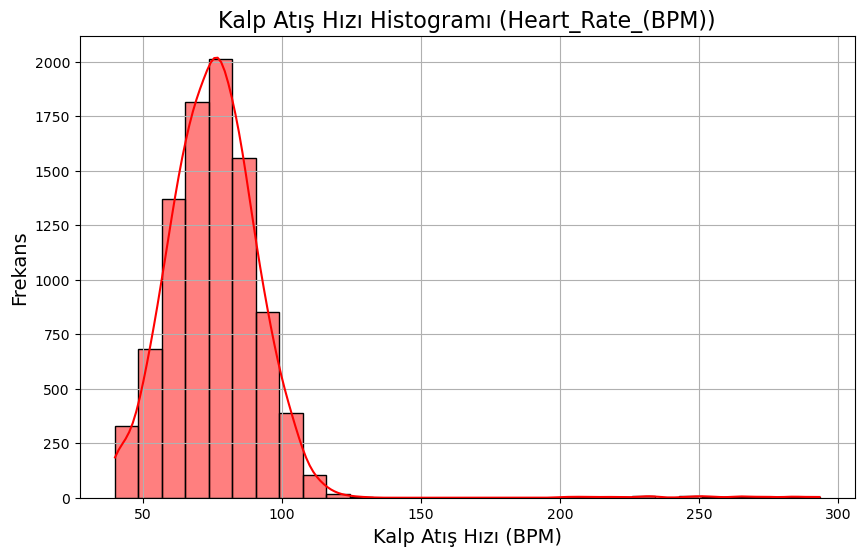

In [265]:
plt.figure(figsize=(10, 6))
sns.histplot(veri2['Heart_Rate_(BPM)'], bins=30, kde=True, color='red')

plt.title("Kalp Atış Hızı Histogramı (Heart_Rate_(BPM))", fontsize=16)
plt.xlabel("Kalp Atış Hızı (BPM)", fontsize=14)
plt.ylabel("Frekans", fontsize=14)
plt.grid(True)
plt.show()

In [266]:
print(veri2['Heart_Rate_(BPM)'].describe())

count    9174.000000
mean       76.065211
std        19.297144
min        40.000000
25%        64.921207
50%        75.306279
75%        85.297838
max       293.221756
Name: Heart_Rate_(BPM), dtype: float64


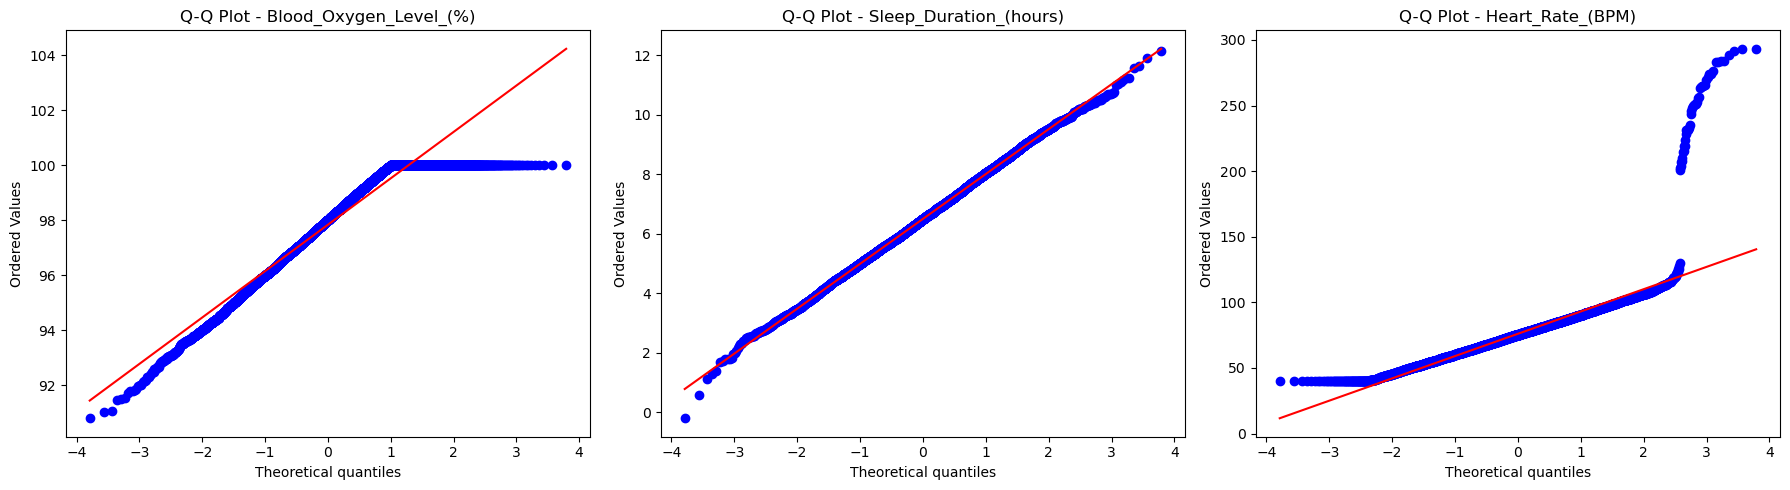

In [269]:
plt.figure(figsize=(18, 5))

# 1. Blood_Oxygen_Level_(%)
plt.subplot(1, 3, 1)
stats.probplot(veri2['Blood_Oxygen_Level_(%)'].dropna(), dist="norm", plot=plt)
plt.title("Q-Q Plot - Blood_Oxygen_Level_(%)")

# 2. Sleep_Duration_(hours)
plt.subplot(1, 3, 2)
stats.probplot(veri2['Sleep_Duration_(hours)'].dropna(), dist="norm", plot=plt)
plt.title("Q-Q Plot - Sleep_Duration_(hours)")

# 3. Heart_Rate_(BPM)
plt.subplot(1, 3, 3)
stats.probplot(veri2['Heart_Rate_(BPM)'].dropna(), dist="norm", plot=plt)
plt.title("Q-Q Plot - Heart_Rate_(BPM)")

plt.tight_layout()
plt.show()

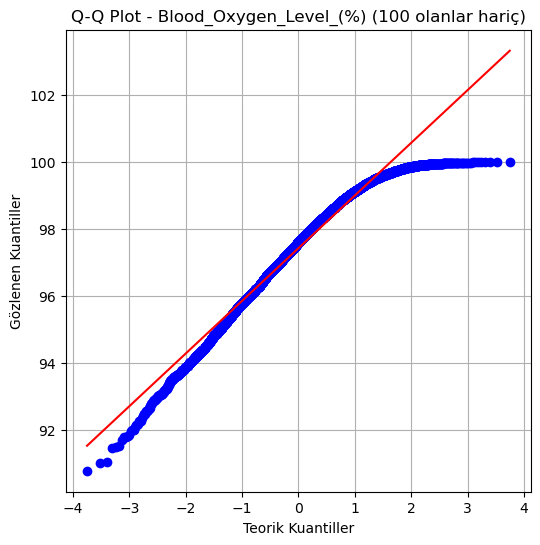

In [270]:
filtered_oxy = veri2[veri2['Blood_Oxygen_Level_(%)'] < 100.0]['Blood_Oxygen_Level_(%)'].dropna()

# Q-Q grafiği
plt.figure(figsize=(6, 6))
stats.probplot(filtered_oxy, dist="norm", plot=plt)
plt.title("Q-Q Plot - Blood_Oxygen_Level_(%) (100 olanlar hariç)")
plt.xlabel("Teorik Kuantiller")
plt.ylabel("Gözlenen Kuantiller")
plt.grid(True)
plt.show()

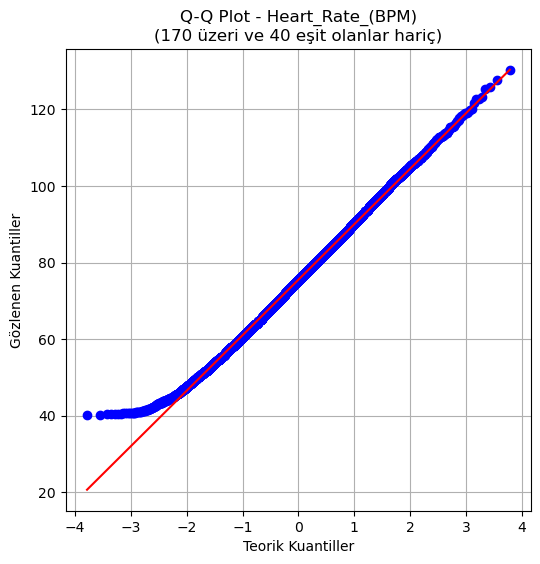

In [274]:
filtered_hr = veri2[(veri2['Heart_Rate_(BPM)'] <= 170) & (veri2['Heart_Rate_(BPM)'] != 40)]['Heart_Rate_(BPM)'].dropna()

# Q-Q grafiği
plt.figure(figsize=(6, 6))
stats.probplot(filtered_hr, dist="norm", plot=plt)
plt.title("Q-Q Plot - Heart_Rate_(BPM)\n(170 üzeri ve 40 eşit olanlar hariç)")
plt.xlabel("Teorik Kuantiller")
plt.ylabel("Gözlenen Kuantiller")
plt.grid(True)
plt.show()

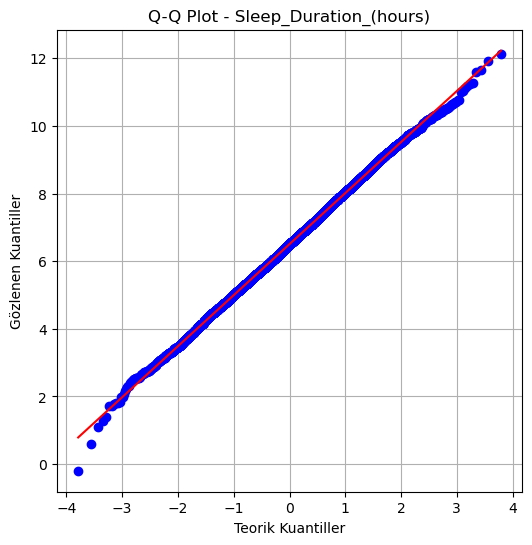

In [275]:
sleep_duration = veri2['Sleep_Duration_(hours)'].dropna()

# Q-Q grafiği
plt.figure(figsize=(6, 6))
stats.probplot(sleep_duration, dist="norm", plot=plt)
plt.title("Q-Q Plot - Sleep_Duration_(hours)")
plt.xlabel("Teorik Kuantiller")
plt.ylabel("Gözlenen Kuantiller")
plt.grid(True)
plt.show()

In [278]:
sleep_data = veri2['Sleep_Duration_(hours)'].dropna()

# Anderson-Darling testini uygula
result = anderson(sleep_data, dist='norm')

# Sonuçları yazdır
result_stat = result.statistic
critical_values = result.critical_values
significance_levels = result.significance_level

# Testin sonucu
print(f"Anderson-Darling Test İstatistiği: {result_stat:.4f}")
print("Kritik Değerler ve Anlamlılık Seviyeleri:")
for i in range(len(critical_values)):
    sl, cv = significance_levels[i], critical_values[i]
    status = "UYUYOR" if result_stat < cv else "UYMUYOR"
    print(f"  {sl}%: kritik değer = {cv:.4f} → {status}")

Anderson-Darling Test İstatistiği: 0.6396
Kritik Değerler ve Anlamlılık Seviyeleri:
  15.0%: kritik değer = 0.5760 → UYMUYOR
  10.0%: kritik değer = 0.6560 → UYUYOR
  5.0%: kritik değer = 0.7870 → UYUYOR
  2.5%: kritik değer = 0.9180 → UYUYOR
  1.0%: kritik değer = 1.0920 → UYUYOR


In [280]:
# Blood_Oxygen_Level_(%) verisindeki eksik değerleri çıkar
blood_oxygen_data = veri2['Blood_Oxygen_Level_(%)'].dropna()

# Anderson-Darling testini uygula
result_blood_oxygen = anderson(blood_oxygen_data, dist='norm')

# Sonuçları yazdır
result_stat_blood_oxygen = result_blood_oxygen.statistic
critical_values_blood_oxygen = result_blood_oxygen.critical_values
significance_levels_blood_oxygen = result_blood_oxygen.significance_level

# Testin sonucu
print(f"Anderson-Darling Test İstatistiği (Blood_Oxygen_Level_(%)): {result_stat_blood_oxygen:.4f}")
print("Kritik Değerler ve Anlamlılık Seviyeleri (Blood_Oxygen_Level_(%)):")
for i in range(len(critical_values_blood_oxygen)):
    sl, cv = significance_levels_blood_oxygen[i], critical_values_blood_oxygen[i]
    status = "UYUYOR" if result_stat_blood_oxygen < cv else "UYMUYOR"
    print(f"  {sl}%: kritik değer = {cv:.4f} → {status}")

Anderson-Darling Test İstatistiği (Blood_Oxygen_Level_(%)): 127.2544
Kritik Değerler ve Anlamlılık Seviyeleri (Blood_Oxygen_Level_(%)):
  15.0%: kritik değer = 0.5760 → UYMUYOR
  10.0%: kritik değer = 0.6560 → UYMUYOR
  5.0%: kritik değer = 0.7870 → UYMUYOR
  2.5%: kritik değer = 0.9180 → UYMUYOR
  1.0%: kritik değer = 1.0920 → UYMUYOR


In [284]:
sleep_data = veri2['Sleep_Duration_(hours)'].dropna()

# D'Agostino’nun K² testini uygula
normaltest(sleep_data)

NormaltestResult(statistic=2.0492846607612307, pvalue=0.3589248189538838)

In [285]:
oxygen_data = veri2['Blood_Oxygen_Level_(%)'].dropna()

# D'Agostino’nun K² testini uygula
normaltest(oxygen_data)

NormaltestResult(statistic=494.5358105781387, pvalue=4.101221082165339e-108)